Pipeline 1: Thu thập Dữ liệu và Tiền xử lý ban đầu

In [47]:
# Cell 1: Imports and Setup
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gc  # For garbage collection

# Force garbage collection
gc.collect()

1317

In [49]:
import os
import pathlib
import pandas as pd  # Make sure you import pandas

print("Current working directory:", os.getcwd())
print(pathlib.Path("data/processed/cv/processed_results.json").resolve())

try:
    # Read CV data from the JSON file
    df = pd.read_json(r"C:\Users\pngoc\OneDrive\Desktop\VNU IS\AI Project\CV-JD-Matching-System\data\processed\cv\processed_results.json")
    
    print("Data loaded successfully")
    print("Number of documents:", len(df))
    
    # Initialize tokenizer
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    tokenizer = Tokenizer(num_words=5000)
    
    # Fit tokenizer on texts
    texts = df['text'].values  # Assuming 'text' is the column containing the extracted text
    tokenizer.fit_on_texts(texts)
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    
    # Pad sequences
    maxlen = 100
    X = pad_sequences(sequences, maxlen=maxlen)
    
    print("Data preprocessing completed")
    print("Input shape:", X.shape)

except Exception as e:
    print(f"Error during data preparation: {str(e)}")


Current working directory: c:\Users\pngoc\OneDrive\Desktop\VNU IS\AI Project\CV-JD-Matching-System\backend\src\models
C:\Users\pngoc\OneDrive\Desktop\VNU IS\AI Project\CV-JD-Matching-System\backend\src\models\data\processed\cv\processed_results.json
Data loaded successfully
Number of documents: 459
Data preprocessing completed
Input shape: (459, 100)


Pipeline 2: Xây dụng và huấn luyện mô hình

In [50]:
# Cell 3: Define model
try:
    # Model parameters
        vocab_size = min(5000, len(tokenizer.word_index) + 1)
        embedding_dim = 100
        
        # Build model
        model = Sequential([
            Embedding(vocab_size, embedding_dim),
            Bidirectional(LSTM(64, return_sequences=True)),
            BatchNormalization(),
            Dropout(0.3),
            Bidirectional(LSTM(32)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(embedding_dim, activation='tanh')
        ])
        
    # Compile model
        model.compile(
            optimizer='adam',
            loss='mean_squared_error',
            metrics=['cosine_similarity']
        )
        
        print(model.summary())
        
except Exception as e:
    print(f"Error building model: {str(e)}")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [51]:
# Cell 4: Train model
try:
    # Define callbacks
        callbacks = [
            ReduceLROnPlateau(
                monitor='loss',
                factor=0.2,
                patience=2,
                min_lr=1e-5
            ),
            EarlyStopping(
                monitor='loss',
                patience=5,
                restore_best_weights=True
            )
        ]
        
    # Train model
        history = model.fit(
            X, X,  # Autoencoder style training
            validation_split=0.2,
            epochs=10,  # Reduced epochs
            batch_size=16,  # Reduced batch size
            callbacks=callbacks
        )
        
        print("Training completed successfully")
        
except Exception as e:
    print(f"Error during training: {str(e)}")

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 420ms/step - cosine_similarity: 0.1118 - loss: 1454099.2500 - val_cosine_similarity: 0.4963 - val_loss: 1527160.7500 - learning_rate: 0.0010
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - cosine_similarity: 0.3926 - loss: 1382939.6250 - val_cosine_similarity: 0.5271 - val_loss: 1527036.5000 - learning_rate: 0.0010
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - cosine_similarity: 0.5111 - loss: 1396585.3750 - val_cosine_similarity: 0.5493 - val_loss: 1526845.3750 - learning_rate: 0.0010
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - cosine_similarity: 0.5620 - loss: 1516357.5000 - val_cosine_similarity: 0.5645 - val_loss: 1526675.5000 - learning_rate: 0.0010
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - cosine_similarity: 0.5681 - loss: 1438019.3750 - val_cosine_similarity: 0.5698 - val_loss: 1526520.3750 - learning_rate: 0.0010
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - cosine_similarity: 0.5683 - loss: 

In [52]:
# Cell 5: Save model and tokenizer
import os
print(os.listdir(r"C:\Users\pngoc\OneDrive\Desktop\VNU IS\AI Project\CV-JD-Matching-System\data\processed\cv"))
try:
    import json
    import os

    # Create directories if they don't exist
    os.makedirs('data/processed/cv', exist_ok=True)
        
    # Save model
    model.save('data/processed/cv/model.h5')
        
    # Save tokenizer
    tokenizer_json = tokenizer.to_json()
    with open('data/processed/cv/tokenizer.json', 'w') as f:
        json.dump(tokenizer_json, f)
        
    print("Model and tokenizer saved successfully")

except Exception as e:
    print(f"Error saving model and tokenizer: {str(e)}")


['processed_results.json']
Model and tokenizer saved successfully


In [55]:
# Cell 6A: Import and define matching function
import numpy as np

def calculate_cv_match(cv_text, job_description, model, tokenizer):
    """
    Calculate matching score between a CV and job description
    """
    try:
        # Preprocess texts
        cv_seq = tokenizer.texts_to_sequences([cv_text])
        jd_seq = tokenizer.texts_to_sequences([job_description])
        
        # Pad sequences
        maxlen = 100
        cv_pad = pad_sequences(cv_seq, maxlen=maxlen)
        jd_pad = pad_sequences(jd_seq, maxlen=maxlen)
        
        # Get embeddings
        cv_embedding = model.predict(cv_pad, verbose=0)
        jd_embedding = model.predict(jd_pad, verbose=0)
        
        # Calculate cosine similarity
        similarity = np.dot(cv_embedding[0], jd_embedding[0]) / (
            np.linalg.norm(cv_embedding[0]) * np.linalg.norm(jd_embedding[0])
        )
        
        return float(similarity * 100)  # Convert to percentage
        
    except Exception as e:
        print(f"Error calculating match: {str(e)}")
        return 0.0

In [58]:
# Cell 6B: Define example job description
job_description = """
We are looking for a Python Developer with:
- Strong experience in Python programming
- Knowledge of machine learning and data analysis
- Experience with web frameworks like Django or Flask
- Database experience (SQL, MongoDB)
- Good understanding of software development principles

Requirements:
- Bachelor's degree in Computer Science or related field
- 3+ years of professional Python development experience
- Experience with cloud platforms (AWS/Azure)
"""

print("Job Description loaded")

Job Description loaded


In [ ]:
print(cv_df.columns)  # Check the column names
# Cell 6C: Process CVs and calculate matches
try:
    # Read CV data
    cv_df = pd.read_json(
        r"C:\Users\pngoc\OneDrive\Desktop\VNU IS\AI Project\CV-JD-Matching-System\data\processed\cv\processed_results.json"
    )
    print(f"Loaded {len(cv_df)} CVs")
    
    # Calculate matches
    results = []
    for index, row in cv_df.iterrows():
        # Use 'text' instead of 'content'
        score = calculate_cv_match(row['text'], job_description, model, tokenizer)
        results.append({
            'filename': row['filename'],
            'match_score': score
        })
        print(f"Processed CV {index + 1}/{len(cv_df)}", end='\r')
    
    print("\nCV processing completed")
    
except Exception as e:
    print(f"Error processing CVs: {str(e)}")


Index(['filename', 'text', 'word_count', 'processed_date', 'file_size_kb'], dtype='object')
Loaded 459 CVs


In [31]:
# Cell 6D: Create and display results
try:
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by match score
    results_df = results_df.sort_values('match_score', ascending=False)
    
    # Display top matches
    print("\nTop CV Matches:")
    print("-" * 50)
    print(results_df.to_string(index=False))
    
    # Save results
    output_path = 'data/processed/cv/matching_results.csv'
    results_df.to_csv(output_path, index=False)
    print(f"\nResults saved to: {output_path}")
    
except Exception as e:
    print(f"Error handling results: {str(e)}")


Top CV Matches:
--------------------------------------------------
                                                        filename  match_score
                                                    57262959.pdf    99.777454
                                                    29050809.pdf    99.766725
                                                    20356750.pdf    99.732977
                                                    43622023.pdf    99.728769
                               Mansi_Amazon - Mansi Mehrotra.pdf    99.725604
               Shubham Aggarwal -16803006 - Shubham Aggarwal.pdf    99.717325
                                                    20253563.pdf    99.708229
                                                    15363277.pdf    99.688643
                                                    34304175.pdf    99.685186
                                                    16248476.pdf    99.683344
                                                    29821051.pdf    99.682

KeyError: 'accuracy'

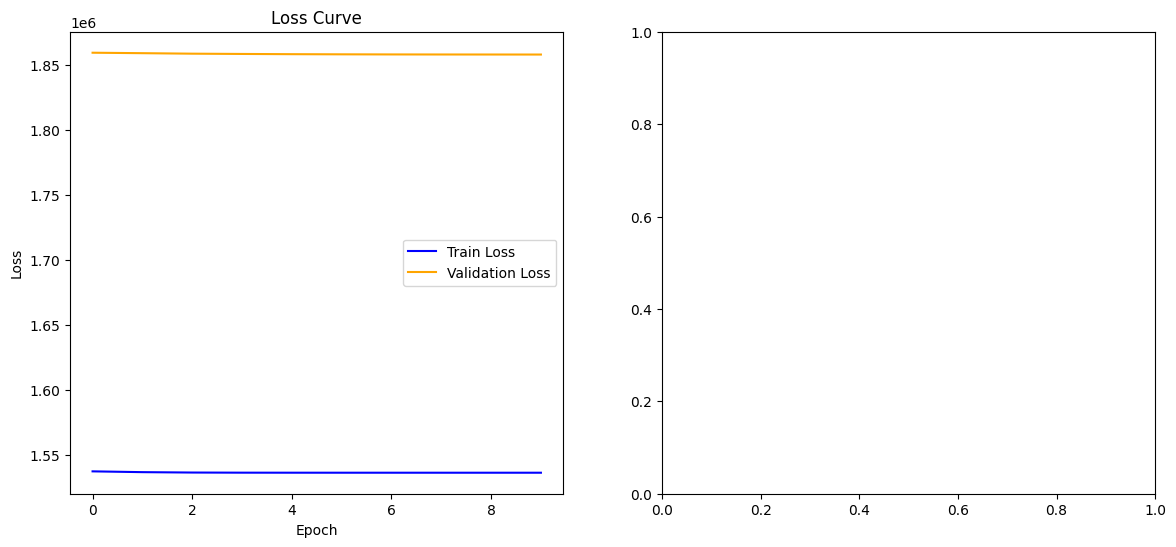

In [32]:
# Cell 7: Vẽ các đường cong Loss và Accuracy

import matplotlib.pyplot as plt

# Vẽ Loss Curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Vẽ Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()